In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\swasa\\Desktop\\DATA\\cancer_classification.csv')

In [4]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  benign_0__mal_1  
0          0.4601                  0.11890                0  
1          0.2750                  0.08902                0  
2          0.3613                  0.08758                0  
3          0.6638                  0.17300                0  
4          0.2364                  0.07678                0  

[5 rows x 31 columns]

In [5]:
 df.shape

(569, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

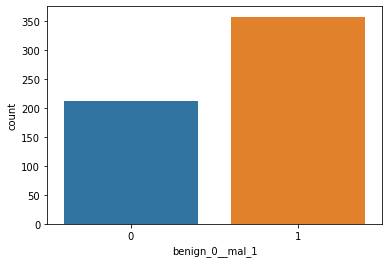

In [7]:
sns.countplot(x = 'benign_0__mal_1', data = df)

In [11]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

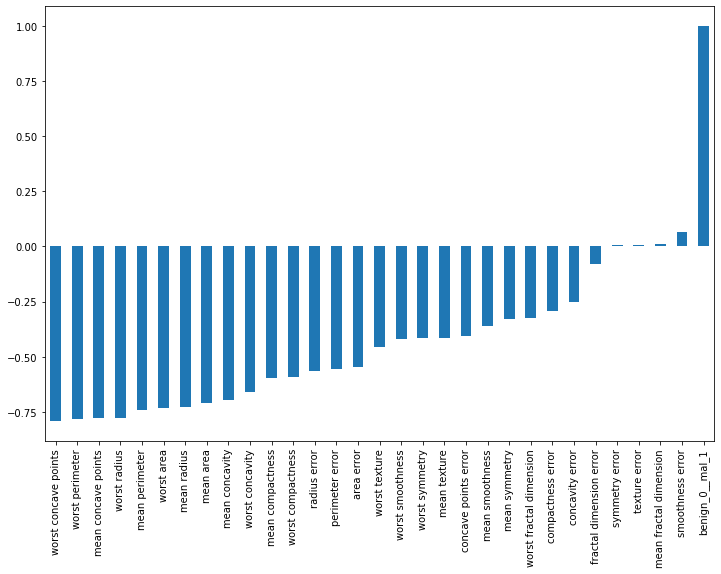

In [14]:
plt.figure(figsize = (12,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

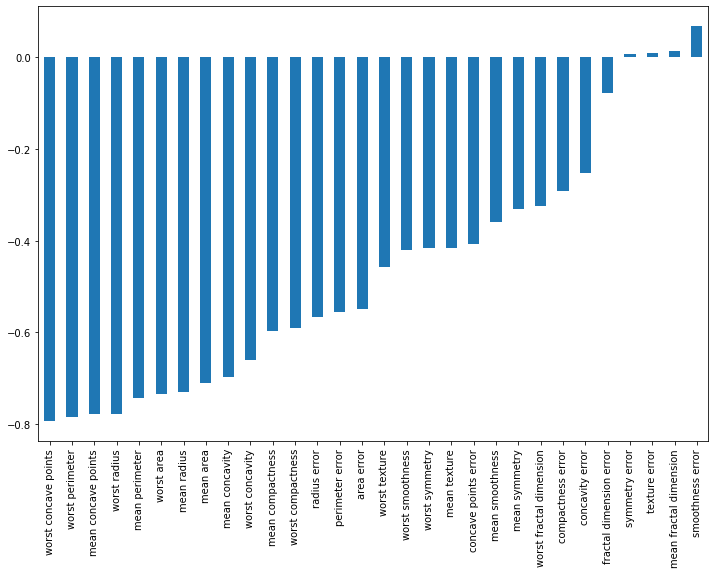

In [15]:
plt.figure(figsize = (12,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

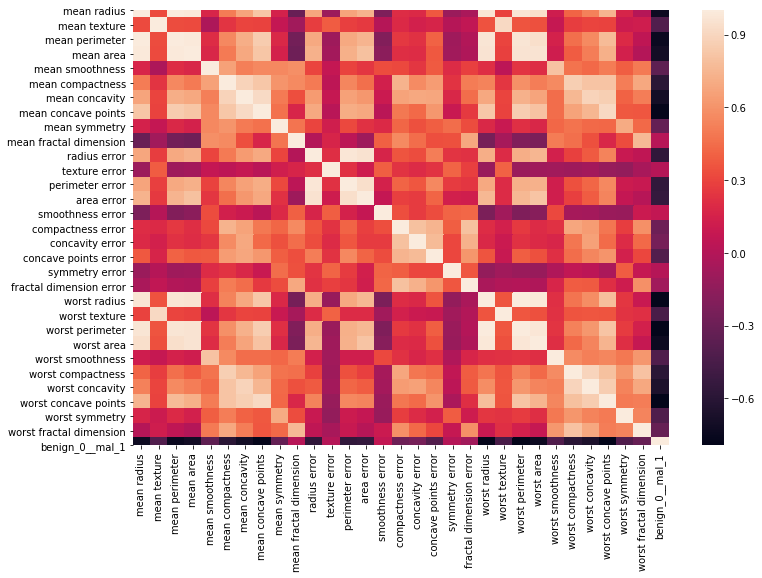

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr())

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


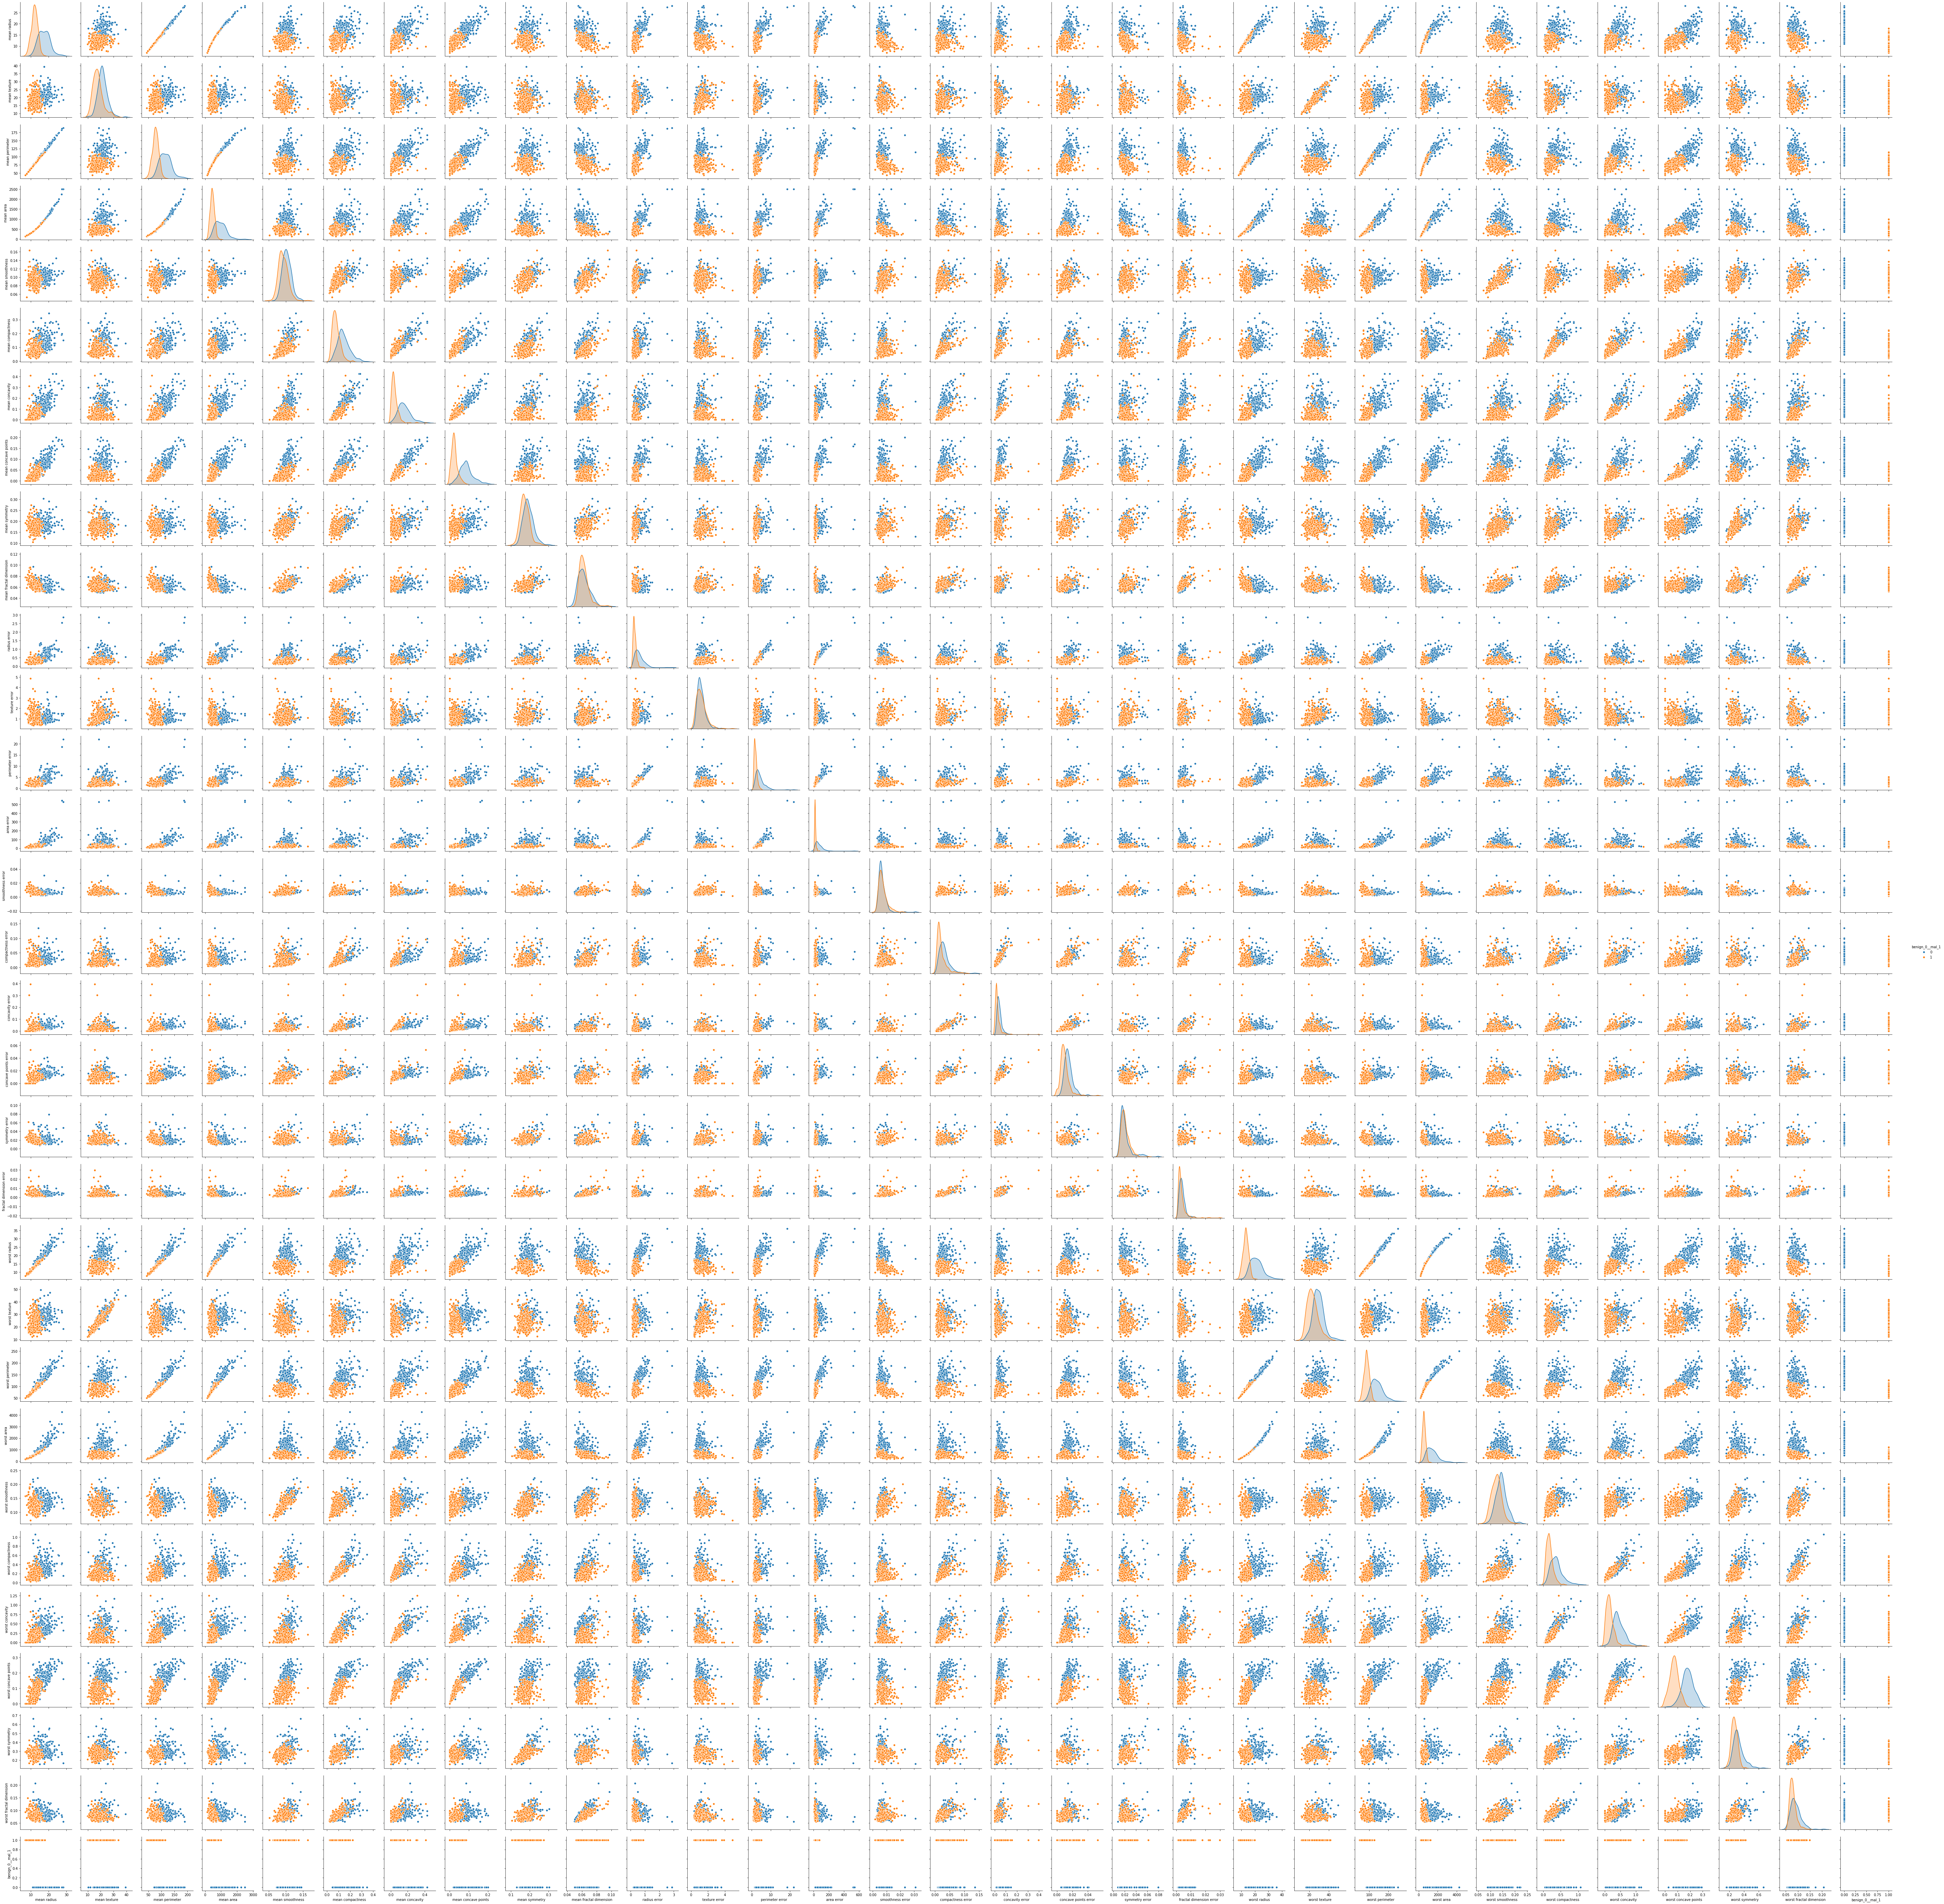

In [20]:
sns.pairplot(df, hue = 'benign_0__mal_1')

In [21]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [34]:
from tensorflow.keras.models import Sequential

In [37]:
from tensorflow.keras.layers import Dense, Dropout

In [38]:
X_train.shape

(426, 30)

In [39]:
model  = Sequential()

model.add(Dense(30,activation = 'relu'))

model.add(Dense(15,activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [40]:
from tensorflow.keras.callbacks import  EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [43]:
model.fit(x = X_train,y = y_train,validation_data = (X_test, y_test),epochs = 600, callbacks =  [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6588 - val_loss: 0.6339
Epoch 2/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6070 - val_loss: 0.5898
Epoch 3/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5587 - val_loss: 0.5398
Epoch 4/600
426/426 [==============================] - 0s 150us/sample - loss: 0.5099 - val_loss: 0.4899
Epoch 5/600
426/426 [==============================] - 0s 124us/sample - loss: 0.4619 - val_loss: 0.4358
Epoch 6/600
426/426 [==============================] - 0s 122us/sample - loss: 0.4117 - val_loss: 0.3847
Epoch 7/600
426/426 [==============================] - 0s 115us/sample - loss: 0.3661 - val_loss: 0.3405
Epoch 8/600
426/426 [==============================] - 0s 115us/sample - loss: 0.3282 - val_loss: 0.3027
Epoch 9/600
426/426 [==============================] - 0s 120us/sample - loss: 0.2973 - val_loss: 0.2717
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0498 - val_loss: 0.1223
Epoch 79/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0643 - val_loss: 0.1108
Epoch 00079: early stopping


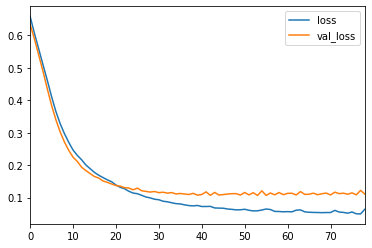

In [44]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [45]:
from tensorflow.keras.layers import Dropout

In [47]:
model  = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [48]:
model.fit(x = X_train,y = y_train,validation_data = (X_test, y_test),epochs = 600, callbacks =  [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7001 - val_loss: 0.6810
Epoch 2/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6822 - val_loss: 0.6632
Epoch 3/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6727 - val_loss: 0.6498
Epoch 4/600
426/426 [==============================] - 0s 138us/sample - loss: 0.6575 - val_loss: 0.6261
Epoch 5/600
426/426 [==============================] - 0s 139us/sample - loss: 0.6360 - val_loss: 0.5973
Epoch 6/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6094 - val_loss: 0.5733
Epoch 7/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5977 - val_loss: 0.5477
Epoch 8/600
426/426 [==============================] - 0s 124us/sample - loss: 0.5797 - val_loss: 0.5231
Epoch 9/600
426/426 [==============================] - 0s 122us/sample - loss: 0.5738 - val_loss: 0.5017
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1210 - val_loss: 0.0976
Epoch 79/600
426/426 [==============================] - 0s 108us/sample - loss: 0.1208 - val_loss: 0.0806
Epoch 80/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1155 - val_loss: 0.0792
Epoch 81/600
426/426 [==============================] - 0s 108us/sample - loss: 0.1262 - val_loss: 0.0966
Epoch 82/600
426/426 [==============================] - 0s 120us/sample - loss: 0.1284 - val_loss: 0.1043
Epoch 83/600
426/426 [==============================] - 0s 108us/sample - loss: 0.1135 - val_loss: 0.0812
Epoch 84/600
426/426 [==============================] - 0s 131us/sample - loss: 0.1179 - val_loss: 0.0804
Epoch 85/600
426/426 [==============================] - 0s 103us/sample - loss: 0.1151 - val_loss: 0.0829
Epoch 86/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0967 - val_loss: 0.0865
Epoch 87/600
426/426 [========================

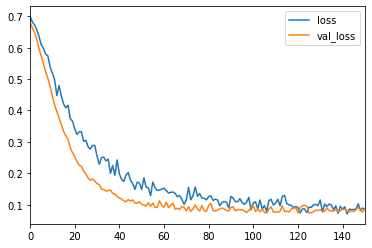

In [49]:
model_loss_with_dropout = pd.DataFrame(model.history.history)
model_loss_with_dropout.plot()

In [50]:
predictions = model.predict_classes(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [54]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
